In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import mplfinance as mpf
import yfinance as yf

In [2]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\py\venv\scripts\python.exe -m pip install --upgrade pip' command.


# **Function to save stock data to CSV**


In [112]:
def save_to_csv_from_yahoo(ticker, sdate, edate):
  #start = dt.datetime(sdate)
  #end = dt.datetime(edate)

  #tickerData = yf.Ticker(ticker)
  
  # get historical market data
  #df = tickerData.history(period="max")
  yfdf = yf.download(ticker, start=sdate, end=edate)
  #yfdf = yf.download('gbtc', start="2021-01-01", end="2021-01-01")
  #print(yfdf)
  mydf = pd.DataFrame(yfdf)
  

  #yfdf.actions.to_csv('D:\\py\\pycode\\banas-tut01\\' + ticker + '.csv')
  #csvresult = mydf.to_csv('D:\\py\\pycode\\banas-tut01\\' + ticker + '.csv')
  #csvResult = df.to_csv("d:\\gbtc.csv")
  mydf.to_csv('d:/' + ticker + '.csv')
  #csvresult = mydf.to_csv('gbtc.csv')
  
  return mydf

In [113]:
 save_to_csv_from_yahoo("gbtc", "2021-01-01", "2021-12-11")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,34.090000,36.599998,32.900002,35.080002,35.080002,22817754
2021-01-05,34.490002,39.540001,34.490002,39.410000,39.410000,19229033
2021-01-06,41.419998,44.000000,39.750000,43.930000,43.930000,40502899
2021-01-07,47.700001,48.410000,40.810001,44.970001,44.970001,32619323
2021-01-08,47.849998,48.650002,44.360001,44.419998,44.419998,23124734
...,...,...,...,...,...,...
2021-12-06,38.049999,39.169998,36.689999,38.400002,38.400002,10139690
2021-12-07,40.400002,41.599998,39.759998,40.099998,40.099998,7786222
2021-12-08,39.689999,41.009998,39.650002,40.330002,40.330002,4088135


# **Get data from CSV**

In [3]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv('d:/' + ticker + '.csv')
    except FileNotFoundError:
        print("File not found")
    else:
        return df


# **Add daily return to DF**

In [4]:
# simple daily return: (Ending Prid - Beginning Price)/Beginning Price or (EP/BP)-1

def add_daily_return_to_df(df,ticker):
    df['Daily_Return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    df.to_csv('d:/' + ticker + '.csv')
    return df


# **Returns Total Return over Time**

In [5]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Use a mask to grab data between defined dates
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    
    # Get the mean of the column named daily return
    daily_ret = df.loc[mask]['Daily_Return'].mean()
    
    # Get the number of days between 2 dates
    df2 = df.loc[mask]
    days = df2.shape[0]

    # Return the total return between 2 dates
    return (days * daily_ret)

# **Matplotlib Finance**

In [6]:
# Creates a simple price / date plot between dates
def price_plot(ticker, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:

        df = pd.read_csv('D:/' + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # Convert to Numpy array
        df_np = df_sub.to_numpy()
        
        # Get adjusted close data from the 5th column
        np_adj_close = df_np[:,5]
        
        # Get date from the 1st
        date_arr = df_np[:,1]
        
        # Defines area taken up by the plot
        fig = plt.figure(figsize=(12,8),dpi=100)
        axes = fig.add_axes([0,0,1,1])
        
        # Define the plot line color as navy
        axes.plot(date_arr, np_adj_close, color='navy')
        
        # Set max ticks on the x axis
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        
        # Add a grid, color, dashes(5pts 1 pt dashes separated by 2pt space)
        axes.grid(True, color='0.6', dashes=(5, 2, 1, 2))
        
        # Set grid background color
        axes.set_facecolor('#FAEBD7')


In [7]:
# Receives a ticker and the date range for which to plot
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv',index_col=0,parse_dates=True)
        # For MacOS
        df = pd.read_csv('d:/' + ticker + '.csv',index_col=0,parse_dates=True)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # A candlestick chart demonstrates the daily open, high, low and closing price of a stock
        mpf.plot(df_sub,type='candle')

        # Plot price changes
        mpf.plot(df_sub,type='line')

        # Moving averages provide trend information (Average of previous 4 observations)
        mpf.plot(df_sub,type='ohlc',mav=4)
        
        # Define a built in style
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})
        # Pass in the defined style to the whole canvas
        fig = mpf.figure(figsize=(12, 8), style=s) 
        # Candle stick chart subplot
        ax = fig.add_subplot(2,1,1) 
        # Volume chart subplot
        av = fig.add_subplot(2,1,2, sharex=ax)  

        # You can plot multiple MAVs, volume, non-trading days
        mpf.plot(df_sub,type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)

# **Test Functions**

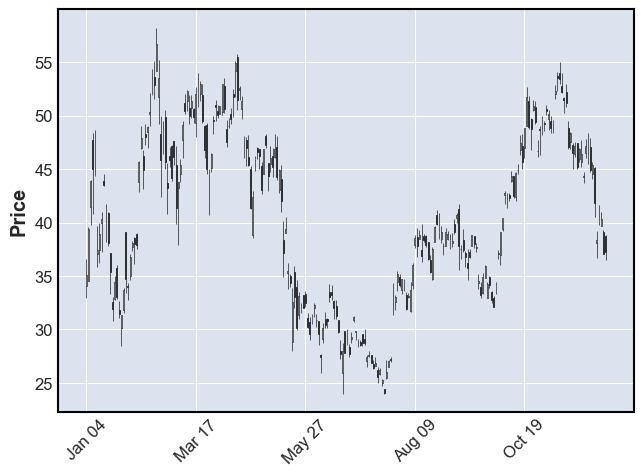

In [14]:
GBTC = get_df_from_csv("GBTC")
#print (GBTC)
# Set data.index as DatetimeIndex
GBTC.index = pd.DatetimeIndex(GBTC['Date'])
mpf.plot(GBTC,type='candle')



In [8]:
GBTC = get_df_from_csv("GBTC")

add_daily_return_to_df(GBTC,"GBTC")

#print(GBTC)

tot_ret = get_return_defined_time(GBTC, 2021, 1, 1, 2021, 11, 1)
print("Total Return :", tot_ret)

mplfinance_plot(GBTC, 'candle', 2021, 1, 1, 2021, 12, 10)

Total Return : 0.6613763672118693


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')